# Titanic Train Project

In [91]:
#Importing the liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")

In [30]:
#Loading the Data
tt=pd.read_csv("titanictrain.csv")
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Observation:
    The dataset contains 891 data points with 12 independent features(age, sex, bmi, children, smoker, region) and 1 target  
    feature(charges)

In [31]:
tt.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#Observation: There are nine integer dtypes and two float dtypes

In [34]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:

There were 891 passengers on board the Titanic
The average age of the passenger was 29.6 years old
The average fare of the passenger was $32.20
There were less women on board than men (based on the survival rate of .38)
Most passengers traveled alone (SibSp and Parch means the average passenger had .52 siblings/spouses and .38 parents/children aboard, which adds up to less than 1)
There were few passengers who travelled with large families (the maximum number of siblings/spouses a passenger travelled with was 6, and the maximum number of parents/children a passenger travelled with was 5)

In [35]:
tt.shape

(891, 12)

In [36]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
tt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis

In [38]:
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in this dataset.

<Axes: >

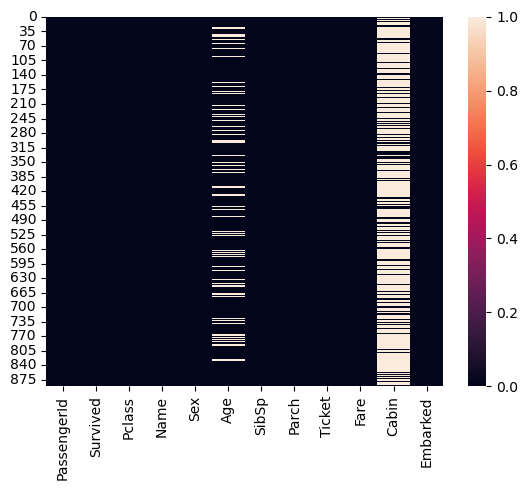

In [39]:
sns.heatmap(tt.isnull())

In [40]:
#Checking the skewness

In [92]:
tt.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.246689
dtype: float64

<Axes: xlabel='PassengerId', ylabel='Density'>

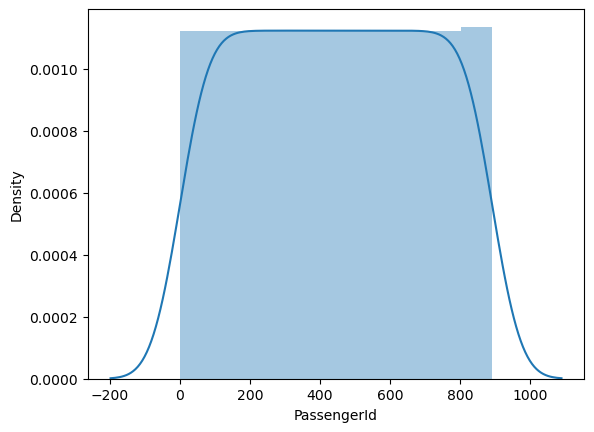

In [93]:
sns.distplot(tt['PassengerId'])

<Axes: xlabel='Survived', ylabel='Density'>

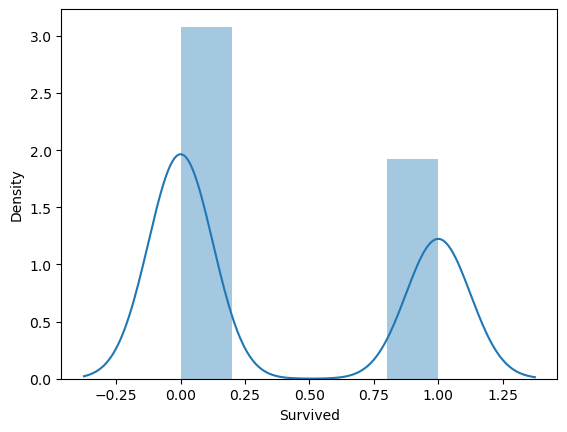

In [94]:
sns.distplot(tt['Survived'])

<Axes: xlabel='Pclass', ylabel='Density'>

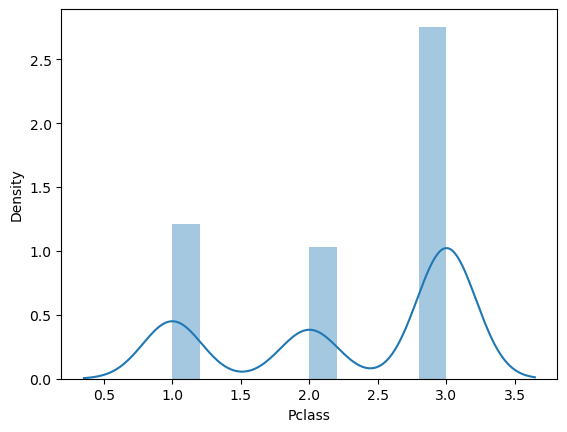

In [95]:
sns.distplot(tt['Pclass'])

<Axes: xlabel='Age', ylabel='Density'>

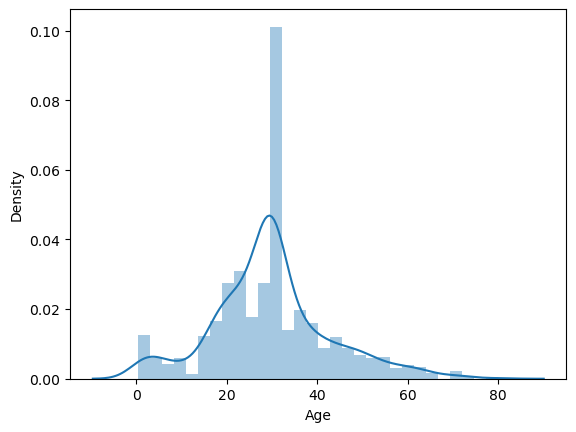

In [96]:
sns.distplot(tt['Age'])

<Axes: xlabel='SibSp', ylabel='Density'>

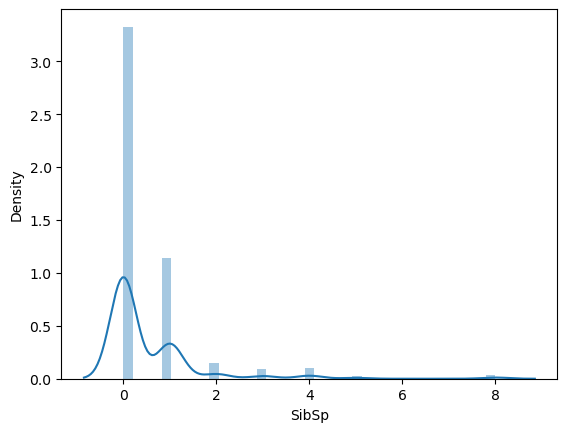

In [97]:
sns.distplot(tt['SibSp'])

<Axes: xlabel='Parch', ylabel='Density'>

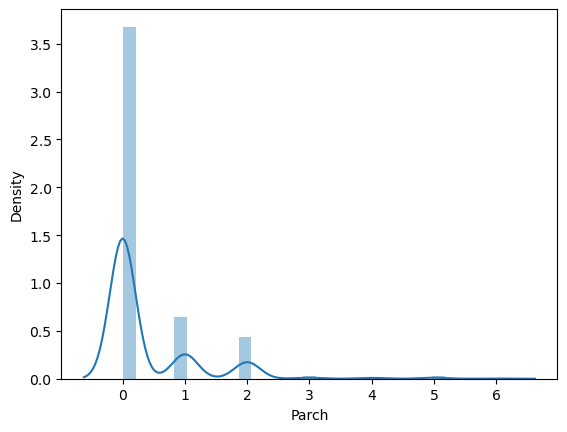

In [98]:
sns.distplot(tt['Parch'])

<Axes: xlabel='Fare', ylabel='Density'>

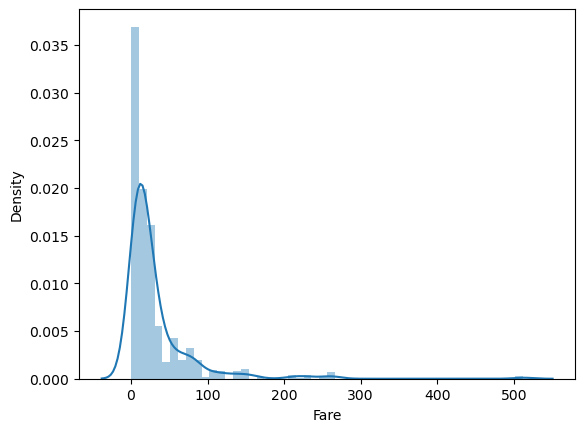

In [99]:
sns.distplot(tt['Fare'])

# Visualization

<Axes: xlabel='PassengerId', ylabel='Survived'>

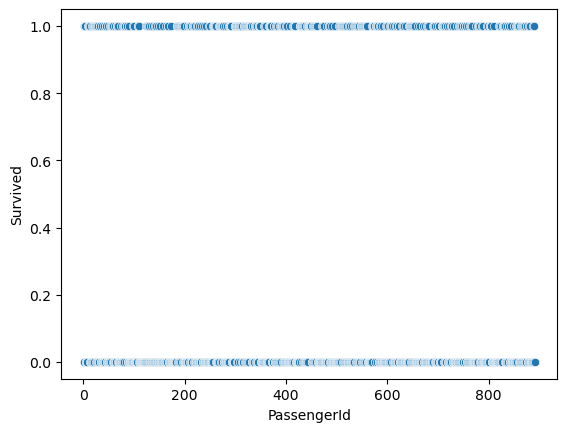

In [49]:
sns.scatterplot(data=tt, x='PassengerId', y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

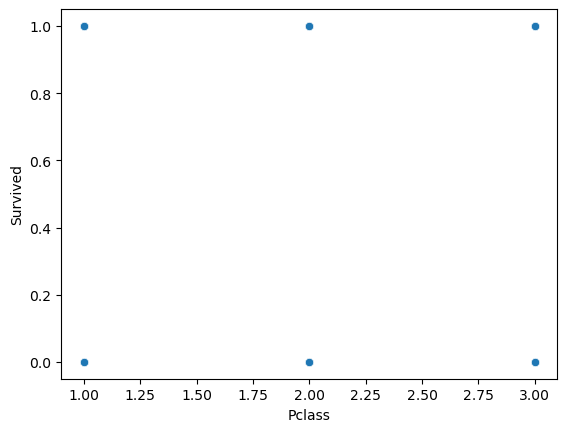

In [50]:
sns.scatterplot(data=tt, x='Pclass', y='Survived')

<Axes: xlabel='Age', ylabel='Survived'>

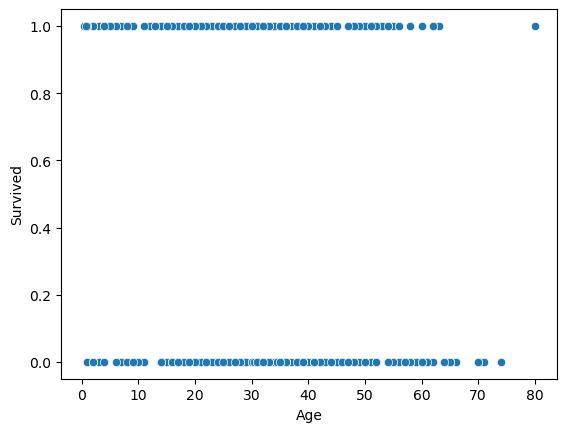

In [51]:
sns.scatterplot(data=tt, x='Age', y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

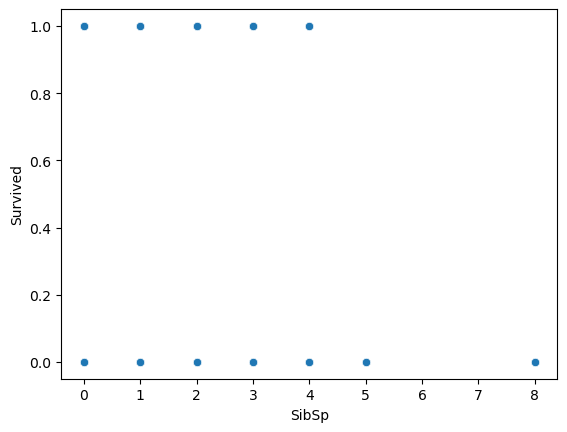

In [52]:
sns.scatterplot(data=tt, x='SibSp', y='Survived')

<Axes: xlabel='Parch', ylabel='Survived'>

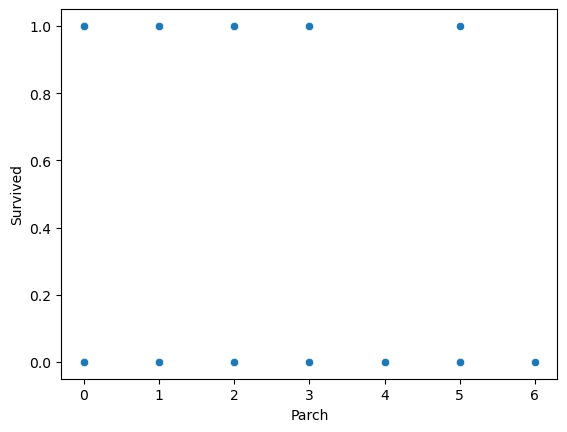

In [53]:
sns.scatterplot(data=tt, x='Parch', y='Survived')

<Axes: xlabel='Fare', ylabel='Survived'>

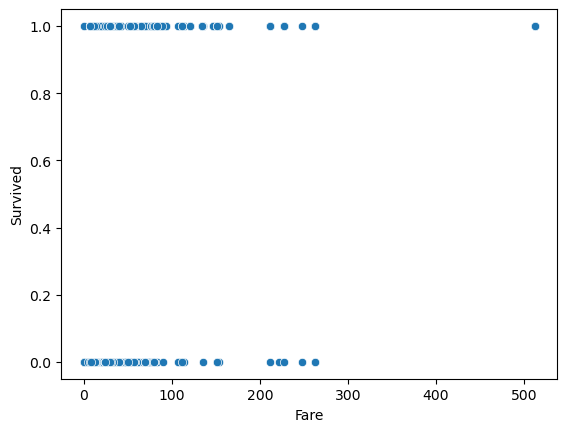

In [54]:
sns.scatterplot(data=tt, x='Fare', y='Survived')

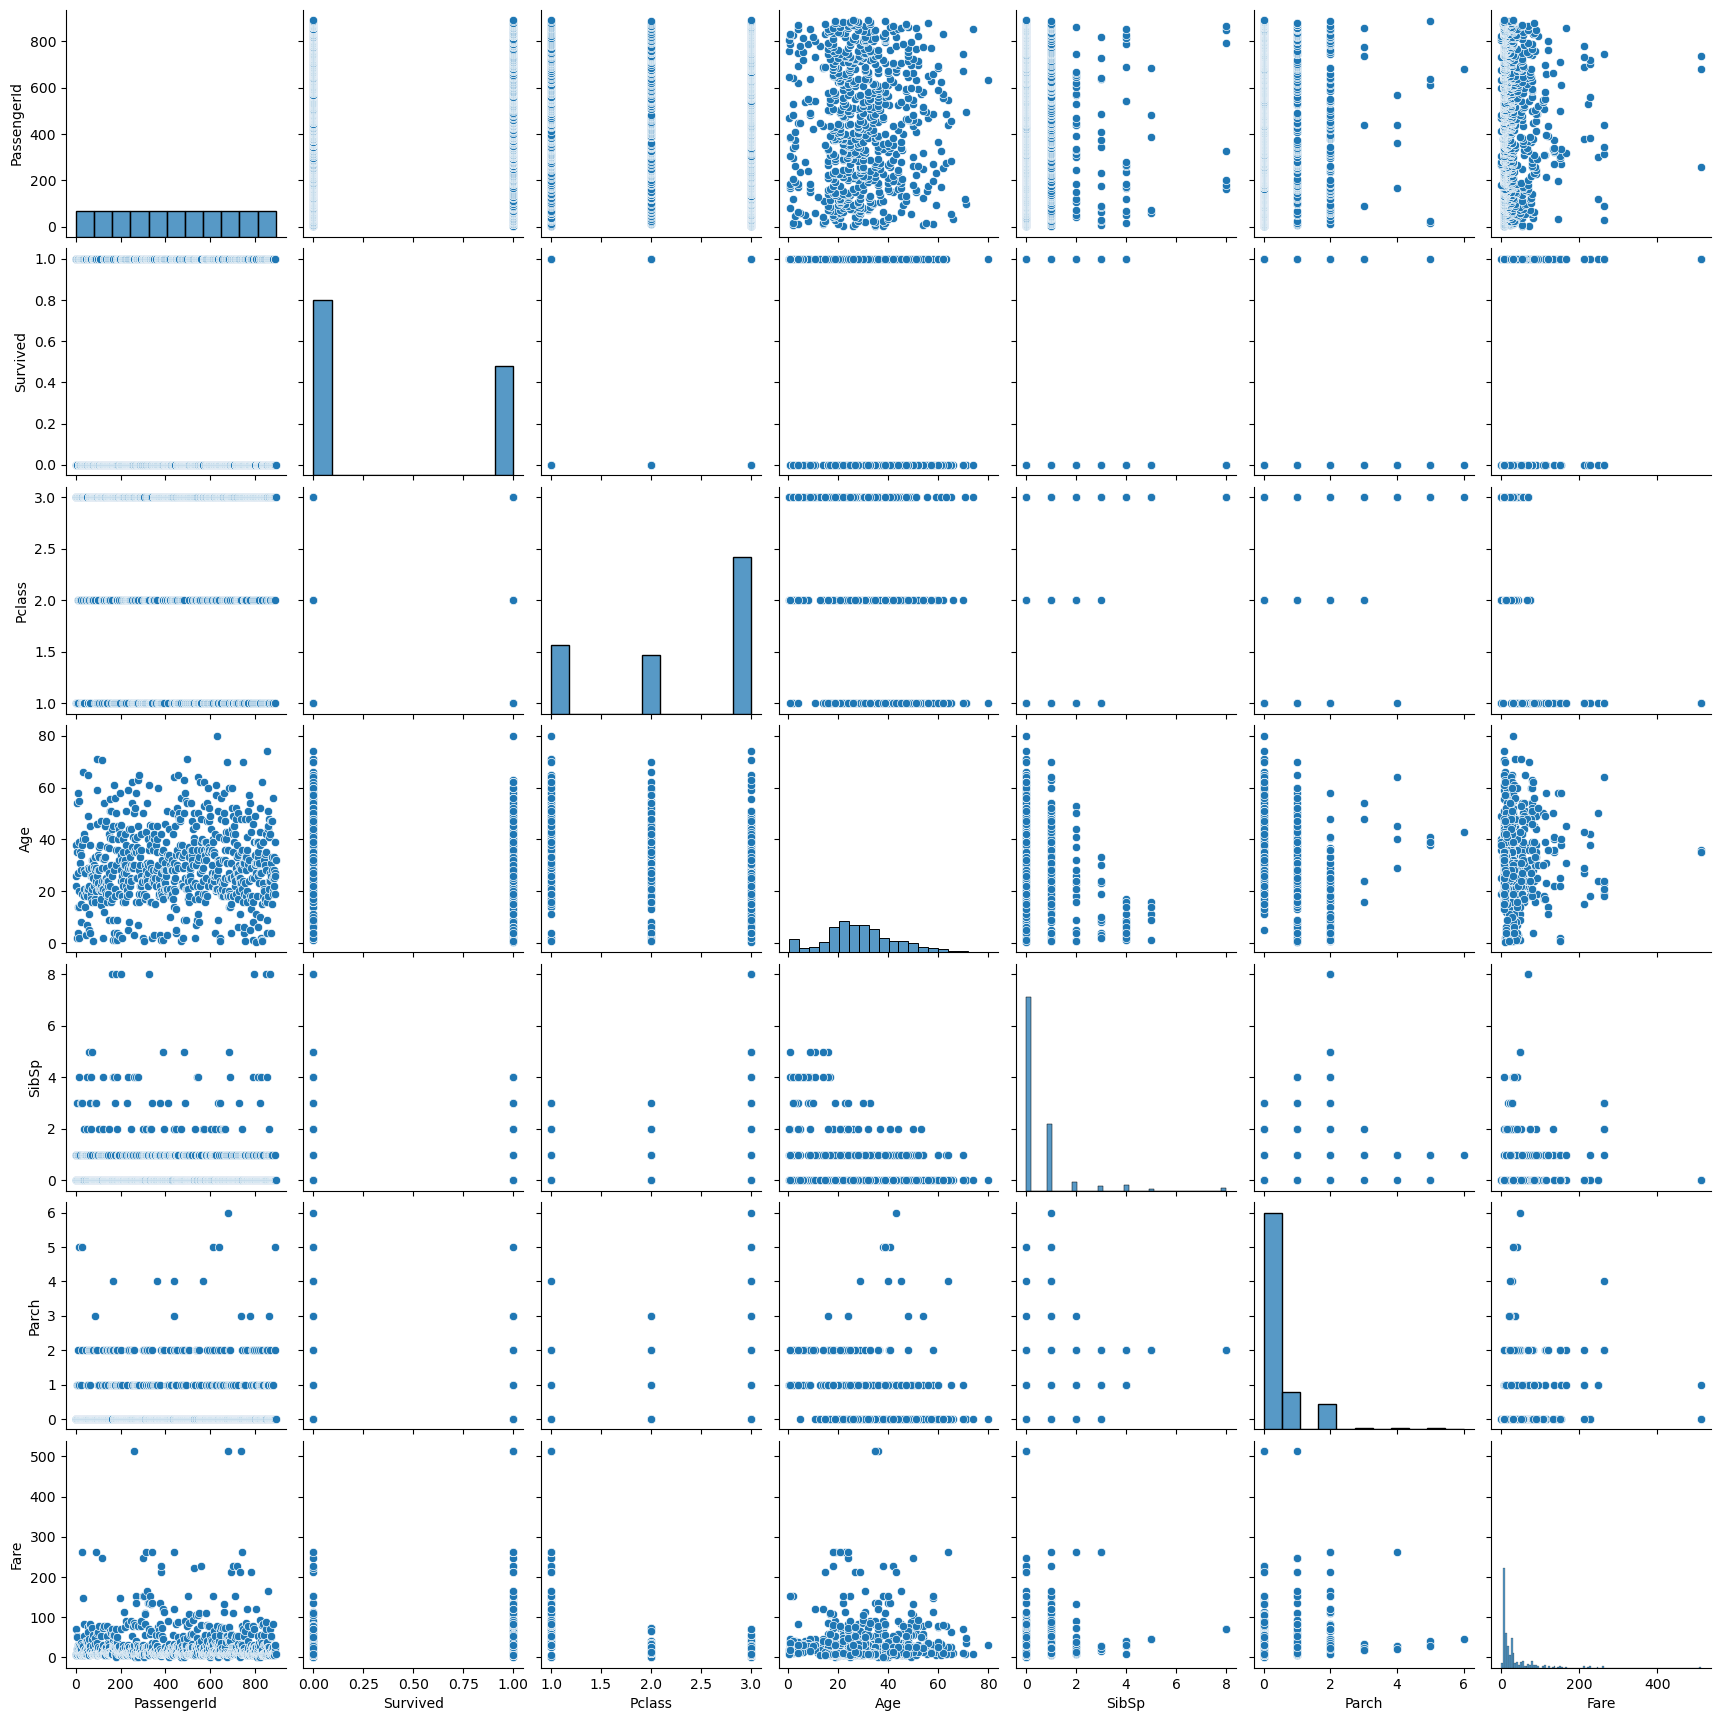

In [55]:
sns.pairplot(tt) 

In [100]:
#Checking the correlation
tt.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.070465,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.001974,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.031818,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.157112
Name,-0.070465,-0.001974,0.031818,1.000000,-0.015007,0.028706,-0.006513,-0.032352,-0.023582,-0.021629,-0.079521
Sex,0.042939,-0.543351,0.131900,-0.015007,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.104057
Age,0.033207,-0.069809,-0.331339,0.028706,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.006513,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.032352,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.038322
Ticket,-0.056554,-0.164549,0.319869,-0.023582,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.021629,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.221226


<Axes: >

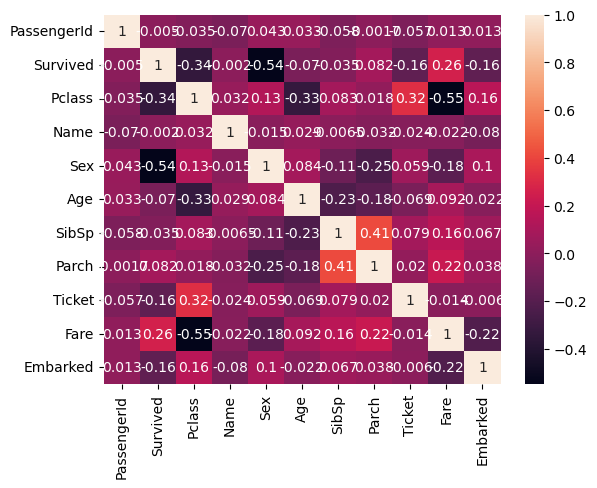

In [101]:
sns.heatmap(tt.corr(),annot=True)

#Observations
There is a weak negative correlation between survival and Pclass (passenger class). This means that passengers in a higher class were less likely to survive.
There is a weak negative correlation between survival and age. This means that younger passengers were slightly more likely to survive.
There is a strong negative correlation between survival and sex. This means that females were much more likely to survive than males.
There is a positive correlation between Pclass and fare. This means that passengers in a higher class paid more for their ticket.
There is a weak positive correlation between SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard). This means that passengers who traveled with family members were more likely to travel with other family members.

In [58]:
 #Checking the Outliers

<Axes: >

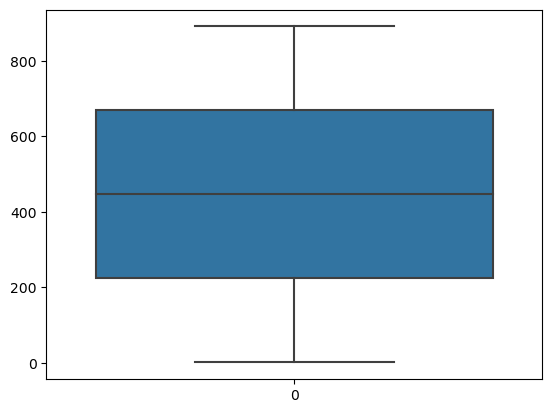

In [59]:
tt.drop_duplicates(inplace=True)
sns.boxplot(tt['PassengerId'])

<Axes: >

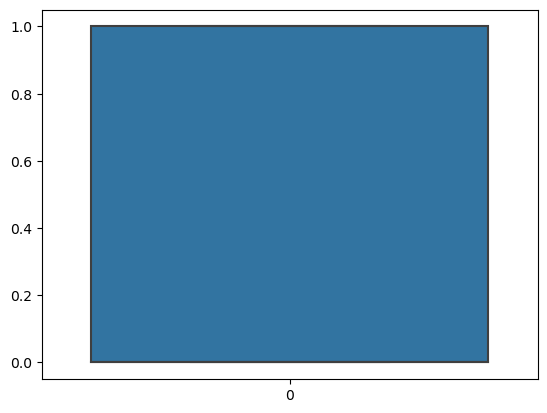

In [60]:
tt.drop_duplicates(inplace=True)
sns.boxplot(tt['Survived'])

<Axes: >

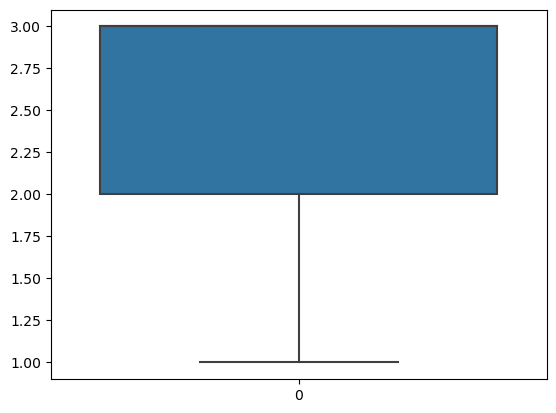

In [61]:
tt.drop_duplicates(inplace=True)
sns.boxplot(tt['Pclass'])

<Axes: >

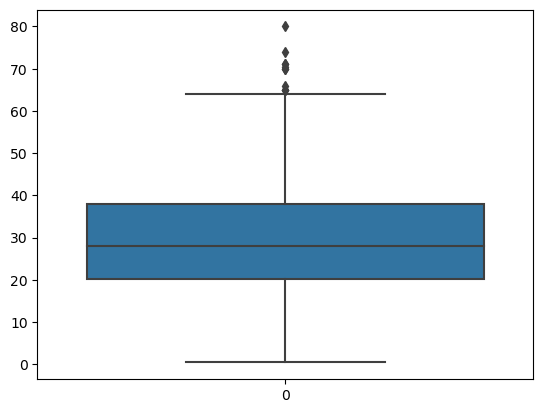

In [62]:
tt.drop_duplicates(inplace=True)
sns.boxplot(tt['Age'])

<Axes: >

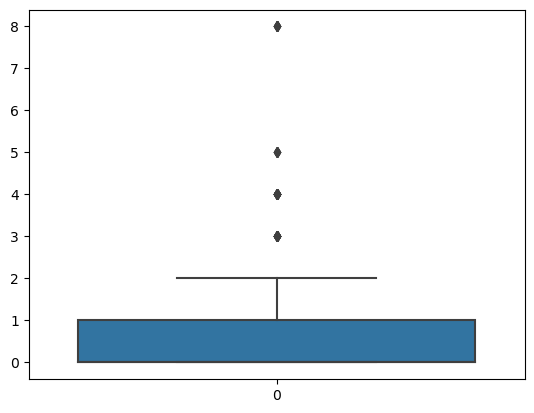

In [63]:
tt.drop_duplicates(inplace=True)
sns.boxplot(tt['SibSp'])

<Axes: >

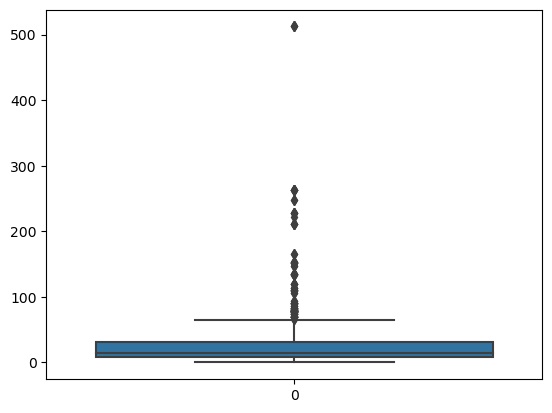

In [64]:
tt.drop_duplicates(inplace=True)
sns.boxplot(tt['Fare'])

In [65]:
#Checking the value count

In [66]:
tt["PassengerId"].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [67]:
tt["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
tt["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [69]:
tt["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [70]:
tt["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [71]:
tt["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

# Data Preprocessing

In [72]:
#Removing NaN values

In [73]:
tt = tt.drop(columns='Cabin', axis=1)

In [74]:
tt['Age'].fillna(tt['Age'].mean(), inplace=True)

<Axes: >

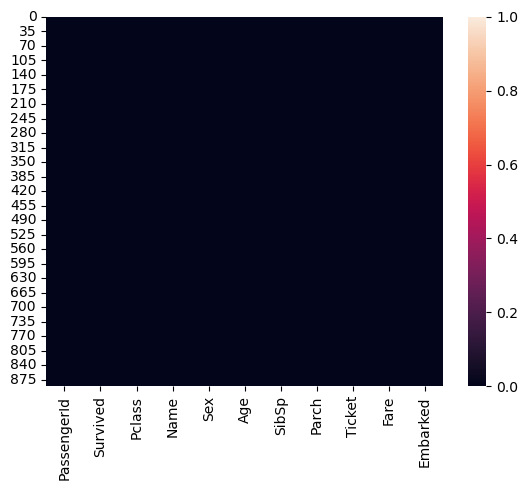

In [75]:
sns.heatmap(tt.isnull())

In [76]:
#Encoding

In [77]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder() 
tt['Name']=le.fit_transform(tt['Name'])
list1=['Name','Sex','Embarked','Ticket']
for val in list1:
    tt[val]=le.fit_transform(tt[val].astype(str))
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,11,1,22.000000,1,0,523,7.2500,2
1,2,1,1,102,0,38.000000,1,0,596,71.2833,0
2,3,1,3,283,0,26.000000,0,0,669,7.9250,2
3,4,1,1,193,0,35.000000,1,0,49,53.1000,2
4,5,0,3,57,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,499,1,27.000000,0,0,101,13.0000,2
887,888,1,1,228,0,19.000000,0,0,14,30.0000,2
888,889,0,3,350,0,29.699118,1,2,675,23.4500,2
889,890,1,1,790,1,26.000000,0,0,8,30.0000,0


In [78]:
#Removing the Outliers

In [79]:
from scipy.stats import zscore
ttzscore=np.abs(zscore(tt))
print(np.where(ttzscore>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 5, 5, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       9, 6, 6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 5, 9, 6, 6, 9, 7,
       7, 5, 7, 5, 7, 9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 5, 7, 9, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 7], dtype=int64))


In [80]:
ttnew=tt[(ttzscore<3).all(axis=1)]
print('ttnew.shape',ttnew.shape)

ttnew.shape (820, 11)


<Axes: >

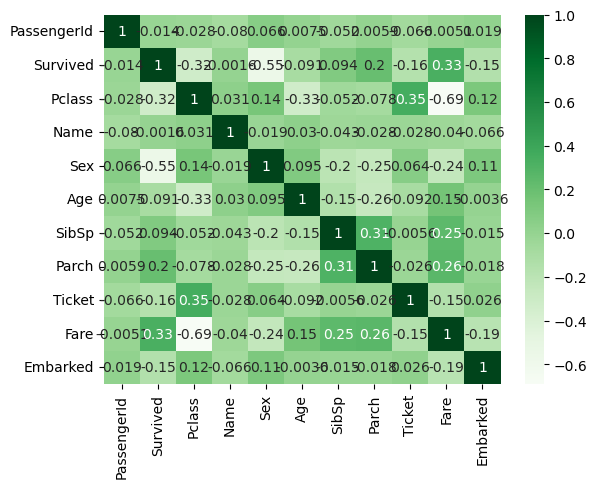

In [81]:
sns.heatmap(ttnew.corr(),cmap="Greens",annot=True)

# Train and Test

In [113]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings ('ignore')

In [114]:
x = ttnew[['PassengerId','Pclass','Name','Sex','Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Embarked']]
y = ttnew['Survived']

In [115]:
x.shape

(820, 10)

In [117]:
y.shape

(820,)

In [118]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [119]:
#Balancing 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

0    500
1    500
Name: Survived, dtype: int64

In [121]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-1.7778619 ,  0.93187184, -1.69296972, ...,  0.98328299,
        -0.6855439 ,  0.64402665],
       [-1.77388555, -1.43328512, -1.33840314, ...,  1.34008507,
         1.45246277, -1.81879036],
       [-1.7699092 ,  0.93187184, -0.63316631, ...,  1.69688714,
        -0.66300634,  0.64402665],
       ...,
       [-0.46964273, -1.43328512,  0.39936276, ..., -1.04511239,
         0.3069241 ,  0.64402665],
       [ 0.26598203, -0.25070664,  0.79678904, ..., -0.63454561,
        -0.0595005 ,  0.64402665],
       [ 0.69145149, -0.25070664, -1.04617793, ..., -1.19663108,
         1.24661791, -0.58738186]])

In [122]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
Xtrain.shape

(800, 10)

In [124]:
Xtest.shape

(200, 10)

In [125]:
ytrain.shape

(800,)

In [126]:
ytest.shape

(200,)

In [127]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(Xtrain, ytrain)
xgb_pred = xgb.predict(Xtest)
print(accuracy_score(ytest, xgb_pred))

0.86


In [128]:
print(confusion_matrix(ytest, xgb_pred))

[[88 14]
 [14 84]]


In [129]:
print(classification_report(ytest, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       102
           1       0.86      0.86      0.86        98

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [131]:
score=cross_val_score(xgb,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.765 0.52  0.325 0.53  0.505]
0.529
0.1399785697883787


In [134]:
predicted_values = list(xgb.predict(Xtest))
original_values = list(ytest)

In [187]:
predicted_df = pd.DataFrame({'predicted_values': predicted_values, 'original_values': original_values})
pd.DataFrame(predicted_df)

,predicted_values,original_values
0,1,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
195,0,1
196,0,0
197,0,0
198,0,0


In [ ]:
#predicting if an arbitrary passenger on Titanic would survive the sinking or not

In [177]:
def titanicpredict(p):
    p=p.values.reshape(1,-1)
    pred=xgb.predict(p)
    print("Predicted Value:",pred)
    if pred==0:
        print("The person did not survive")
    else:
        print("The person survived")    

In [186]:
p=pd.DataFrame({'PassengerID':[8900],
                'Name':[101],
                'Pclass': [2],
                'Sex': [1],
                'Age': [45],
                'SibSp': [1],
                'Parch': [0],
                'Ticket':[6250],
                'Fare':[425.90],
                'Embarked':[2]
})
titanicpredict(p)

Predicted Value: [0]
The person did not survive
